In [1]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [3]:
pip install better_profanity

The filename, directory name, or volume label syntax is incorrect.

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
from termcolor import colored as cd
from pprint import pprint
from textblob import TextBlob
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
#nltk.download('punkt')
import string
from better_profanity import profanity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import cross_val_score
from sklearn.metrics.pairwise import cosine_similarity
import string


# # Import API key
# try:
#   from config import gkey
# except:
#   from api_keys import g_key 
#   gkey = g_key   

In [6]:
# Get SouthPark data  
pd.options.mode.chained_assignment = None
SP_Diag_dirty = pd.DataFrame(pd.read_csv("../resources/All-seasons.csv")) 
SP_Diag = SP_Diag_dirty.replace('\n','', regex=True) 
SP_Diag.head(5)

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away."
1,10,1,Kyle,Going away? For how long?
2,10,1,Stan,Forever.
3,10,1,Chef,I'm sorry boys.
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [7]:
# Add data series to hold word Count 
SP_Diag["Word Count"] = np.nan
SP_Diag.head(5)

,Season,Episode,Character,Line,Word Count
0,10,1,Stan,"You guys, you guys! Chef is going away.",NaN
1,10,1,Kyle,Going away? For how long?,NaN
2,10,1,Stan,Forever.,NaN
3,10,1,Chef,I'm sorry boys.,NaN
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",NaN


In [8]:
# Get word count 
WordListAll = []

for i, row in SP_Diag.iterrows():
    SP_Diag['Word Count'][i] = len(SP_Diag['Line'][i].split())
    wl = SP_Diag['Line'][i].split()
    WordListAll.extend(wl)

SP_Diag.head(5)  

,Season,Episode,Character,Line,Word Count
0,10,1,Stan,"You guys, you guys! Chef is going away.",8.0
1,10,1,Kyle,Going away? For how long?,5.0
2,10,1,Stan,Forever.,1.0
3,10,1,Chef,I'm sorry boys.,3.0
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",15.0


In [9]:
# Get word count 
# Initialize lists to hold words
WordListAll = []
WordListFiltered =[]

# Get lists from NLTK library
StopWords = set(stopwords.words('english'))
pun = set(string.punctuation)   # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

# Set tokenizer of choice 
tknzr = TweetTokenizer(preserve_case=False)


# Loop through South Park DF set raw word count
for i, row in SP_Diag.iterrows():
    SP_Diag['Word Count'][i] = len(SP_Diag['Line'][i].split())
    new_line = SP_Diag['Line'][i].replace("'", "") # clear apostrophes
    #wl = SP_Diag['Line'][i].split()  # Split with apostrophes
    wl = new_line.split()
    WordListAll.extend(wl) # Add to word list
    # words = word_tokenize(SP_Diag['Line'][i])  # selected a tokenizer that worked better
    words = tknzr.tokenize(SP_Diag['Line'][i])
    # For each tokenized word check to see if it is punctuation or stop word
    for word in words:
        if word not in pun:
            if word.lower() not in StopWords:
                WordListFiltered.append(word)
        else:    
             WordListAll.append(word)

SP_Diag.head(5)   

,Season,Episode,Character,Line,Word Count
0,10,1,Stan,"You guys, you guys! Chef is going away.",8.0
1,10,1,Kyle,Going away? For how long?,5.0
2,10,1,Stan,Forever.,1.0
3,10,1,Chef,I'm sorry boys.,3.0
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",15.0


In [10]:
# Reuse NLTK library with MIT list of offensive words file needs proper credit 
Curse_words = set(stopwords.words("bad-words.txt"))

# Initialize variable to hold list of bad words
WordListBad = []

# Add series to hold number of bad words
SP_Diag["Offensive Word Count"] = np.nan

for i, row in SP_Diag.iterrows():
    bad_word_count = 0
    words = tknzr.tokenize(SP_Diag['Line'][i]) 
    for word in words:
        if word.lower() in Curse_words:
            bad_word_count += 1
            WordListBad.append(word)
        SP_Diag['Offensive Word Count'][i] = bad_word_count
            #print(f'found a bad word on line {i}, {word} {bad_word_count}. ')

In [11]:
# Create clean dataframe to plot
data = [SP_Diag['Season'], SP_Diag['Offensive Word Count']]
headers = ["Season", "Offensive Word Count"]
df3 = pd.concat(data, axis=1, keys=headers)
df4 = df3.loc[SP_Diag['Season'] != 'Season' ].astype(float)
df5 = df4.sort_values('Season')
df = df5.groupby('Season').agg(['sum']).reset_index()

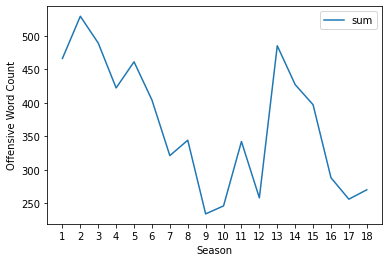

In [12]:
# Plot the dataframe
df.plot(x='Season', y='Offensive Word Count', kind="line", xticks=range(1,19))
plt.xlabel('Season')
plt.ylabel('Offensive Word Count')
plt.show()